# Gradient Descent

Gradient Descent is a fundamental optimization algorithm used in logistic regression to minimize the cost function and find optimal values for the model parameters. This iterative optimization technique adjusts the parameters in the direction of the steepest decrease in the cost function.

## Cost Function Recap

The binary cross-entropy loss is a common way to represent the cost function in logistic regression. For a single training example, it is given by:

$$ J(\theta) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right] $$

where $ \hat{y} $ is the expected probability and $ y $ is the actual label (0 or 1).

## Derivation of the Gradient

The gradient of the cost function with respect to the parameters ($ \theta $) must be calculated in order to use gradient descent. The gradient for logistic regression is provided by:

$$ \nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \mathbf{x}^{(i)} $$

In this case, the number of training examples is $m$, the predicted probability is $ \hat{y}^{(i)} $, the actual label is $ y^{(i)} $, and the feature vector for the $i $-th example is $ \mathbf{x}^{(i)} $.

## Gradient Descent Update Rule

In order to minimize the cost function, gradient descent updates the parameters ($ \theta $) in the opposite direction of the gradient. Update rules are provided by:

$$ \theta = \theta - \alpha \nabla J(\theta) $$

where the learning rate, $\alpha$, regulates the number of steps taken during optimization.

## Batch Gradient Descent

Every iteration of Batch Gradient Descent computes the gradient using the complete training dataset. Although it can be computationally expensive for large datasets, it offers accurate updates.

## Example

Consider the logistic regression cost function:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

Here, $ J(\theta) $ is the cost function, $ m $ is the number of training examples, $ y^{(i)} $ is the actual output for the $ i^{th} $ example, $ h_\theta(x^{(i)}) $ is the predicted output, and $ \theta $ represents the parameters of the model.

The gradient descent update rule for logistic regression is given by:

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$

Here, $ \alpha $ is the learning rate.

## Implementation

Let's implement a simple gradient descent for logistic regression in Python:

```python
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - learning_rate * gradient
        cost = compute_cost(theta, X, y)
        costs.append(cost)

    return theta, costs

# Example usage:
# Assuming X is your feature matrix and y is the target variable
# Add a column of ones to X for the bias term
X = np.column_stack((np.ones(m), X))
theta = np.zeros(X.shape[1])
learning_rate = 0.01
num_iterations = 1000

theta, costs = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Executable content: Gradient Descent
 
Utilizing the <i><b>"load_digits"</b></i> dataset from the scikit-learn library, which comprises hand-written digit images, the objective is to predict the corresponding digit (ranging from 0 to 9) based on the pixel values. The subsequent example outlines the implementation of <b>Logistic Regression with Gradient Descent </b> for this dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augmenting features with an intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing parameters for the logistic regression model using the gradient descent approach
theta = np.zeros((X.shape[1], len(np.unique(y))))  # Employing the one-vs-all strategy for multi-class classification

# Specifying hyperparameters
learning_rate = 0.01
epochs = 1000

# Executing the Gradient Descent optimization
for epoch in range(epochs):
    # Calculating softmax probabilities
    logits = np.dot(X_train, theta)
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

    # Employing one-hot encoding for the target variable
    y_onehot = np.eye(len(np.unique(y)))[y_train]

    # Computing the gradient
    gradient = np.dot(X_train.T, (probabilities - y_onehot)) / len(y_train)

    # Updating model parameters
    theta -= learning_rate * gradient

# Generating predictions on the test set
logits_test = np.dot(X_test, theta)
predictions_test = np.argmax(logits_test, axis=1)

# Assessing the model's performance
accuracy = np.mean(predictions_test == y_test)
print(f"Accuracy on the test set: {accuracy}")

# Note: Visualizing the decision boundary is not practical in this high-dimensional feature space.

Accuracy on the test set: 0.9361111111111111


<i>This script modifies the logistic regression model to accommodate multi-class classification through the utilization of the one-vs-all strategy applied to the digits dataset. The script encompasses distinct phases, incorporating training, testing, and assessment procedures. It is imperative to acknowledge that the visualization of the decision boundary is rendered impractical within this expansive high-dimensional feature space.</i>

Visual representations serve as instrumental tools for elucidating nuanced aspects of model performance. The ensuing script represents an expanded iteration that incorporates visual depictions of the confusion matrix alongside illustrative examples of predicted outcomes:

Accuracy on the test set: 0.9666666666666667


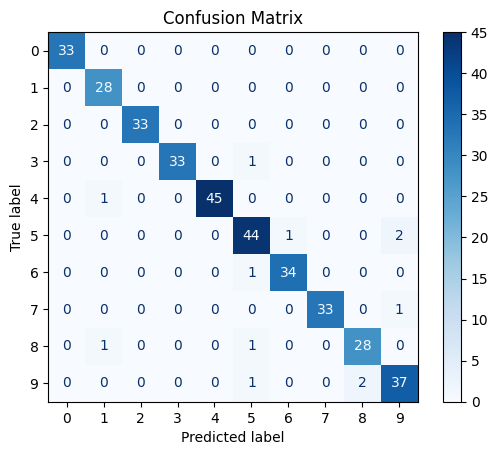

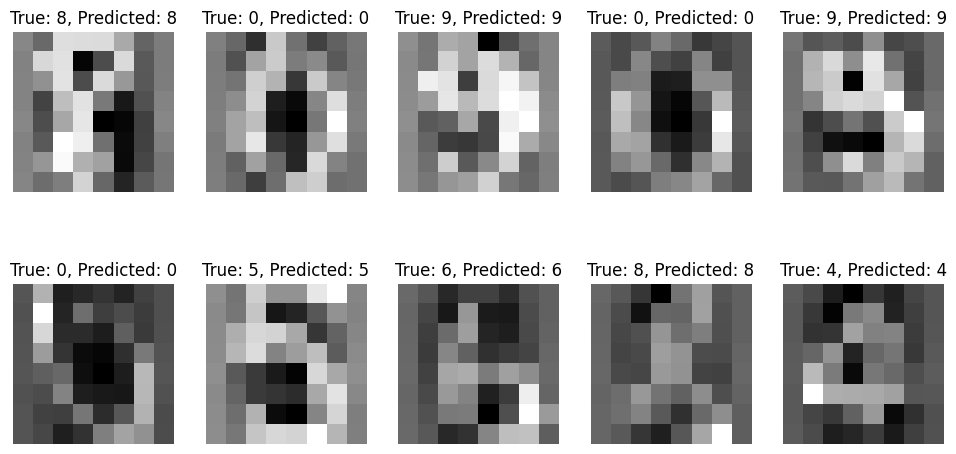

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Acquiring the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augmenting features with an intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Segregating the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiating logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
model.fit(X_train, y_train)

# Deriving predictions on the test set
predictions_test = model.predict(X_test)

# Assessing the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

# Visualizing the Confusion Matrix using ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Displaying sample predictions
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_images = X_test[sample_indices, 1:]  # Excluding the intercept term for plotting
sample_labels = y_test[sample_indices]
predicted_labels_sample = predictions_test[sample_indices]

# Plotting sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {sample_labels[i]}, Predicted: {predicted_labels_sample[i]}")
    ax.axis('off')

plt.show()

<i>The example below creates an interactive visualization using sliders to select the class for which you want to display the confusion matrix. Please ensure that you have the necessary dependencies installed (matplotlib, numpy, scikit-learn, ipywidgets). You can install ipywidgets using:<i>

```console 
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, widgets

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_test = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_test)

# Function to plot confusion matrix for a specific class
def plot_confusion_matrix(class_idx):
    class_name = f'Class {class_idx}'
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {class_name}')

# Use ipywidgets interact to create a slider for class selection
interact(plot_confusion_matrix, class_idx=widgets.IntSlider(min=0, max=9, step=1, value=0))
plt.show()

Accuracy on the test set: 0.9666666666666667


interactive(children=(IntSlider(value=0, description='class_idx', max=9), Output()), _dom_classes=('widget-int…